# Exploration Notebook
This notebook serves as a way for me to test my models!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print("Notebook is ready for day 1!")

Notebook is ready for day 1!


In [2]:
# Format prices with the dollar sign and to the nearest hundredth (nearest cent)
def format_price(price):
    """Format a price as dollars with 2 decimal places."""
    return f"${price:.2f}"

In [1]:
# Enable Python to find modules from the parent directory (OptionPricingApp)
import sys, os
sys.path.append(os.path.abspath(".."))

In [4]:
# Import the call price function from the Black Scholes Model file
from models.black_scholes import call_price

# Assign values to the five arguments of the call price function
S, K, r, T, sigma = 100, 100, 0.01, 1, 0.2
print("Tak's call option price:", format_price(call_price(S, K, r, T, sigma)))

Tak's call option price: $8.43


# Plot Relationship Between Volatility and Call Price

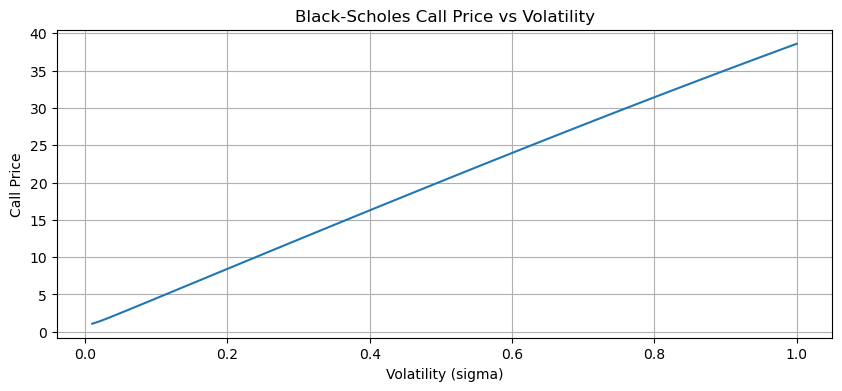

In [5]:
import matplotlib.pyplot as plt
import numpy as np

S, K, r, T = 100, 100, 0.01, 1
# Generate a numpy array of 100 evenly spaced values from 0.01 to 1 for plotting volatility
sigmas = np.linspace(0.01, 1.0, 100)
# Generate an equally sized list for plotting the prices corresponding to each volatility level
prices = [call_price(S, K, r, T, s) for s in sigmas]

# Visualize the data using Matplotlib's pyplot module (create a linegraph)
plt.figure(figsize=(10,4))
plt.plot(sigmas, prices)
plt.xlabel("Volatility (sigma)")
plt.ylabel("Call Price")
plt.title("Black-Scholes Call Price vs Volatility")
plt.grid(True)
plt.show()

# Plot the Greeks as the Underlying Price Moves

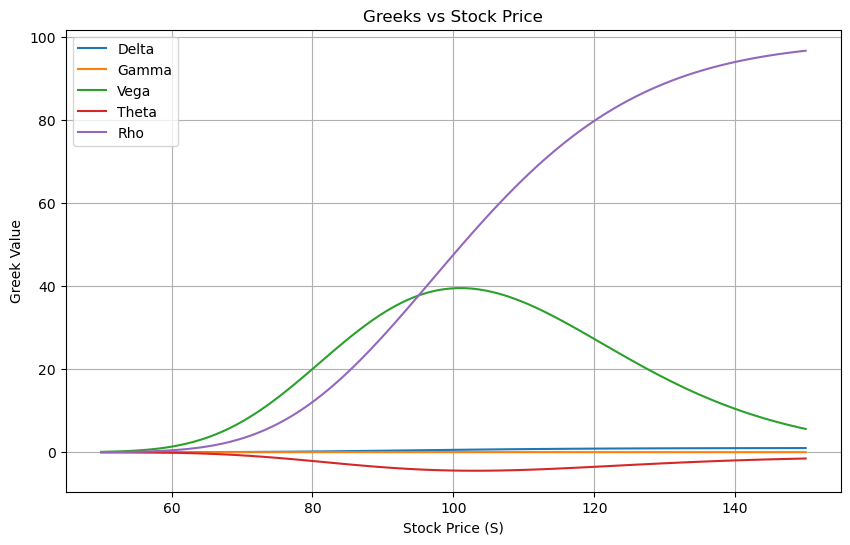

In [6]:
from models.black_scholes import greeks

# Generate an array of 100 evenly spaced values from 50 to 150 for plotting the underlying price (S)
S_values = np.linspace(50, 150, 100)
# Generate an equally sized list of dictionaries holding the values of greeks corresponding to each underlying price
greek_values = [greeks(S, 100, 0.01, 1, 0.2) for S in S_values]

# Visualize the data using Matplotlib's pyplot module (create 5 linegraphs)
plt.figure(figsize=(10,6))
plt.plot(S_values, [g["delta"] for g in greek_values], label = "Delta")
plt.plot(S_values, [g["gamma"] for g in greek_values], label = "Gamma")
plt.plot(S_values, [g["vega"] for g in greek_values], label = "Vega")
plt.plot(S_values, [g["theta"] for g in greek_values], label = "Theta")
plt.plot(S_values, [g["rho"] for g in greek_values], label = "Rho")
plt.legend()
plt.xlabel("Stock Price (S)")
plt.ylabel("Greek Value")
plt.title("Greeks vs Stock Price")
plt.grid(True)
plt.show()

# Black-Scholes Convergence

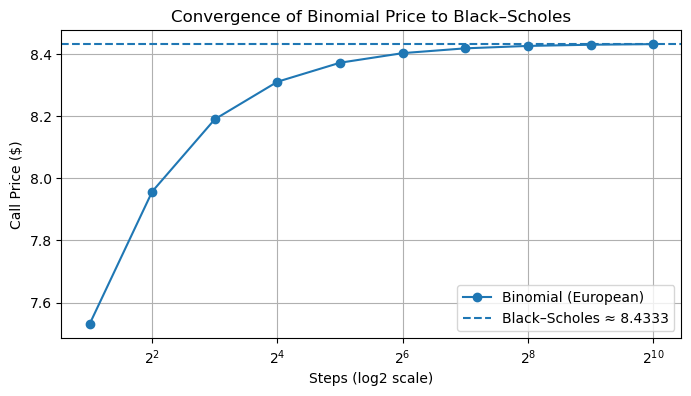

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from models.black_scholes import call_price
from models.binomial import binomial_price


# As the steps increase, we should expect the binomial call price to converge to the black scholes price
steps_list = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
bino_prices = [binomial_price(S, K, r, T, sigma, steps = s, type = "call", american = False) for s in steps_list]

plt.figure(figsize=(8,4))
# Once again, let's create a line graph
plt.plot(steps_list, bino_prices, marker = "o", label = "Binomial (European)")
# Plot the black scholes price as a horizontal line on the graph
bs = call_price(100, 100, 0.01, 1.0, 0.2)
plt.axhline(bs, linestyle = "--", label = f"Black–Scholes ≈ {bs:.4f}")
# Remember that the lognormal distribution is used for options pricing
plt.xscale("log", base = 2)
# Label the graph
plt.xlabel("Steps (log2 scale)")
plt.ylabel("Call Price ($)")
plt.title("Convergence of Binomial Price to Black–Scholes")
plt.legend()
plt.grid(True)
plt.show()